<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81_%EC%9C%A0%EC%82%AC%EB%8F%84_%EC%B8%A1%EC%A0%95(%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import mlxtend #apiori알고리즘 관련 라이브러리
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 ###설치!!!런타임 재시작시 지우고 실행시켜야 합니다.
#!apt -qq -y install fonts-nanum


In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
#fm._rebuild()# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [5]:

data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [6]:

te = TransactionEncoder()

In [7]:
#2차행렬 T/F로 인코딩하고 바꿔주기.
te_ary = te.fit(data).transform(data)
te_ary

array([[ True, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False]])

In [8]:
df = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [10]:
#빈도수를 가지고 지지도를 그려보자.
from mlxtend.frequent_patterns import apriori

In [11]:
#지지도 0.5이상인 행만 추출
result = apriori(df, min_support=0.5, use_colnames=True)
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(기저귀, 쥬스)"
8,0.50,"(맥주, 양상추)"
9,0.50,"(우유, 쥬스)"


In [12]:
type(result)

pandas.core.frame.DataFrame

In [13]:
##쥬스+우유를 함께 산 사람에게 추천을 해준다면
##맥주보다는 기저귀 추천해야함.
##지지도 기반으로 판단!!!!

In [14]:
#one-hot인코딩 방식의 테이블 필요!
#실제로는 물건수가 아주 많음 => 0이 많은 2차원 행렬로 메모리소요 엄청남,시간오래걸림.
#item 수 => 약380개(열)
#유저 수 => 800개(행)
# 0이 2차원 데이터 : 희소행렬(sparse matrix)
#내가 산 물건을 다른안산사람들에게 아이템기반 추천.
#TF-IDF, CounterVectorizor, TransactionEncoder도 같은 방식으로 메모리소요많고 오래걸린다.




In [15]:
#result에서 마지막 itemsets컬럼값 추출(기저귀, 쥬스, 우유)
## 쥬스, 우유와 함께 추천하면 좋을 item은??

In [16]:
choice = result.iloc[10,1]
choice

frozenset({'기저귀', '우유', '쥬스'})

In [17]:
list(items)[0]

NameError: ignored

# word2vec 을 사용하여 추천시스템 해보자
## 자연어에서 특정한 단어를 중심으로 앞 뒤의 단어를 유추(예측)

```
# 코드로 형식 지정됨
```



In [18]:
#word2vec설치
!pip install gensim

In [19]:
from gensim.models import Word2Vec

In [20]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [21]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [22]:
#문장을 토큰으로 끊어내자.
sentences = [ sentence.split(' ') for sentence in doc ]
#sentence한 번 for문 돌때마다 리스트sentence.split(' ') 나옴.총3개의 리스트가 나옴
#[처리내용 for one in 복수형태의자료구조] => 항상 결과는 리스트
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [23]:
sentences2 = [ sentence.split(' ') for sentence in doc2 ]
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [24]:
model = Word2Vec(window=1, min_count=1)
#특정한 단어의 앞뒤에 1번나온패턴
#window => 유추하는 계산을  할 때 특정한 단어의 앞뒤 몇개를 가지고 계산을 할 지의 단위
#min_count => 특정한 패턴의 출현 횟수

In [25]:
#영문 문장을 학습을 시켜보자.
model.build_vocab(sentences)

In [26]:
#특정 단어를 주고 앞 뒤 단어를 추론해보자.
model.wv.most_similar('say')#비지도학습(say에 대해 학습시킨거 아니니까!)
#say앞으로는 he가 나올확률 가장 높음.
#say뒤로는 hello가 나올확률 가장 높음
##따라서 문장을 쓰면 he say hello가 될 확률이 가장 높다.

[('hello', 0.17167267203330994),
 ('unhappy', 0.12297563254833221),
 ('I', 0.11687739193439484),
 ('said', 0.1096619963645935),
 ('goodbye', 0.09067576378583908),
 ('happy', 0.08489887416362762),
 ('i', 0.06599283218383789),
 ('we', 0.0632280558347702),
 ('angry', 0.04090327024459839),
 ('he', 0.034878820180892944)]

In [27]:
model.wv.most_similar('happy')

[('said', 0.21719416975975037),
 ('unhappy', 0.15053623914718628),
 ('say', 0.08489887416362762),
 ('goodbye', 0.0527118556201458),
 ('white', 0.03216644376516342),
 ('he', 0.02353280782699585),
 ('and', 0.014429932460188866),
 ('you', -0.018349628895521164),
 ('angry', -0.01835467666387558),
 ('i', -0.03634927421808243)]

In [28]:
#한글로해보자.
model2 = Word2Vec(window=1, min_count=1)
model2.build_vocab(sentences2)

In [29]:
model2.wv.most_similar('너는')

[('하얗게', 0.19336822628974915),
 ('나는', 0.141940176486969),
 ('우리는', 0.07808360457420349),
 ('굿바이라고', 0.07071756571531296),
 ('기쁘다고', 0.05757969617843628),
 ('블랙으로', 0.04396510124206543),
 ('했고,', 0.03213692456483841),
 ('헬로우라고', -0.01898663118481636),
 ('행복하지', -0.020752940326929092),
 ('슬프다고', -0.022477813065052032)]

In [30]:
#doc, doc2에서 각 문장간의 유사도를 판단해보자.

## 1. stop_words로 불용어처리하기
## 2. 원핫인코딩으로 너무 자주 등장하는 단어 가중치 줄이기.
## 3. 나머지로 원핫인코딩 방식으로 메트릭스 생성.

In [31]:
tfidf = TfidfVectorizer(stop_words='english')#불용어처리가능한 ifidf객체 생성
#영어가 아닌것들 없애버리기
#ifidf는 빈도수를 구하긴 하지만, 문서마다 자주 등장하는 문서는 각 문서를 구분할 단어로
#사용하기는 부적합하여 가중치를 낮추어 계산.

In [32]:
tfidf_matrix = tfidf.fit_transform(doc)
tfidf_matrix

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [33]:
# 3*9에서
# 3은 문서의 개수
# 9는 단어의 개수

In [34]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [35]:
#문장간에 유사도를 구해봅시다

# cosine_similarity(tfidf_matrix, tfidf_matrix)의
# 행은 문서1, 문서2, 문서3
# 열도 문서1, 문서2, 문서3
# 문장 간 유사도는?
## 문서1+문서2:0.20689715
## 문서1+문서3:0.20689715
## 문서2+문서3:0.10416404
### 코사인 유사도는 표절검사할 때 쓰인다.

In [36]:
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [37]:
#행은 문서1, 문서2, 문서3
#열도 문서1, 문서2, 문서3
#유사도는?

In [38]:
#장바구니 유사도를 구해보자.

# 장바구니 유사도 측정결과
## 장바구니1과 장바구니2는 33%정도 유사도가 있다.
## 장바구니1과 장바구니3는 87%정도 유사도가 있다.
## 장바구니1과 장바구니4는 유사도가 없다.
## 장바구니2과 장바구니3는 58%정도 유사도가 있다.
## 장바구니2과 장바구니4는 82%정도 유사도가 있다.
## 장바구니3과 장바구니4는 35%정도 유사도가 있다.
### 장바구니1과 유사도가 가장 높은 장바구니를 찾아서 추천해주고 싶은 item을 골라보자.
### => 장바구니1과 장바구니3이 가장 유사도가 높고 (약87%) '양상추'를 추천.
 

In [39]:
#2차행렬 T/F로 인코딩하고 바꿔준 te_ary객체를 이용해서 코사인 유사도 측정을 해보자.
#코사인유사도를 측정하려면 무조건 인코딩이 되어있어야함!!!!.
basket_cos = cosine_similarity(te_ary, te_ary)
basket_cos
#행렬 모두 장바구니1, 장바구니2, 장바구니3, 장바구니4

array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

In [40]:
basket_cos[0][1:]

array([0.33333333, 0.8660254 , 0.        ])

In [41]:
max_idx = np.argmax(basket_cos[0][1:])#argmax는 리스트에서 가장 높은 값 인덱스 추출
print('가장 유사도가 높은 장바구니 번호는', max_idx+1+1)#인덱스 0 1..로 가고 처음값 제거했으니까 +2를 해준다.

가장 유사도가 높은 장바구니 번호는 3


In [42]:
#3번 장바구니에서 1번장바구니를 빼면 1번이 아직 사지 않은 물건들을 확인 할 수 있다.
#리스트는 -연산을 쓸 수 없어 set(집합)으로 형변환해줌.
set(data[2])-set(data[0])

{'양상추'}

# 그래프를 그려보자!!
## 장바구니1에 대한 장바구니1,2,3,4와의 유사도 그래프

In [45]:
import matplotlib.pyplot as plt
import numpy as np

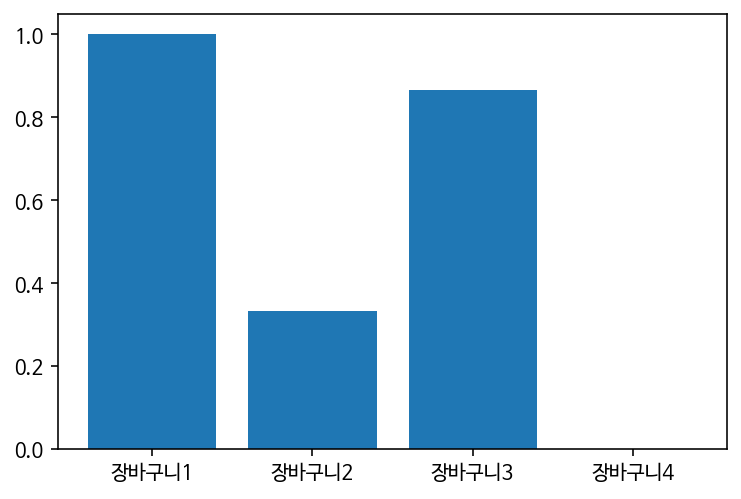

In [44]:
x = np.arange(4)
sim1 = [1,0.33333333,0.8660254,0]
sim2 = ['장바구니1','장바구니2','장바구니3','장바구니4']
plt.bar(x,sim1)
plt.xticks(x,sim2)
plt.show()